# **ALP Data Mining Responsi**
Kelompok 9:
*   Kenneith Wijaya (0706022210023)
*   Kezia Elice Yulianto (0706022210006)

---

**METADATA** <br>
The dataset that we will use is a Telco Customer Churn Dataset. The dataset includes information about customers who left, the services they use, their account details, and demographic information. It can be used to analyze all relevant customer data and develop focused customer retention programs.

The raw data contains 7043 rows (customers) and 21 columns (features).

*   **customerID**: Customer ID
*   **gender**: Whether the customer is a male or a female
*   **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
*   **Partner**: Whether the customer has a partner or not (Yes, No)
*   **Dependents**: Whether the customer has dependents or not (Yes, No)
*   **tenure**: Number of months the customer has stayed with the company
*   **PhoneService**: Whether the customer has a phone service or not (Yes, No)
*   **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
*   **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
*   **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
*   **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
*   **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
*   **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
*   **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
*   **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
*   **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
*   **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
*   **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   **MonthlyCharges**: The amount charged to the customer monthly
*   **TotalCharges**: The total amount charged to the customer
*   **Churn**: Whether the customer churned or not (Yes or No)

## **Import Libraries**

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

## **Load Dataset**

In [552]:
# Import dataset and display 10 sample rows from the dataset
df = pd.read_csv('https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
657,7838-LAZFO,Male,0,Yes,No,45,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),78.80,3597.5,No
2696,5472-CVMDX,Female,0,No,No,68,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,38.90,2719.2,No
4076,1325-USMEC,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.35,6944.5,No
3491,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
3405,0744-GKNGE,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),86.80,5327.25,No
4965,9239-ZBZZV,Female,0,No,No,6,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,47.95,305.1,Yes
3505,1335-NTIUC,Male,0,No,No,9,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.95,190.25,No
303,8181-YHCMF,Female,0,Yes,Yes,68,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.30,4109,No
2492,9206-GVPEQ,Male,0,Yes,No,13,No,No phone service,DSL,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,706.85,Yes
5180,0361-HJRDX,Female,0,No,No,68,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),64.35,4539.6,No


## **Exploratory Data Analysis**

In [553]:
# Display the column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [554]:
# Show column description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [555]:
# Drop the column 'customerID' because it is not relevant
df.drop('customerID', axis=1, inplace=True)

In [556]:
# Display the number of each unique value in the categorical columns (including NaN)
gender_count = df['gender'].value_counts(dropna=False)
print(gender_count)
partner_count = df['Partner'].value_counts(dropna=False)
print(partner_count)
dependents_count = df['Dependents'].value_counts(dropna=False)
print(dependents_count)
phone_service_count = df['PhoneService'].value_counts(dropna=False)
print(phone_service_count)
multiple_lines_count = df['MultipleLines'].value_counts(dropna=False)
print(multiple_lines_count)
internet_service_count = df['InternetService'].value_counts(dropna=False)
print(internet_service_count)
online_security_count = df['OnlineSecurity'].value_counts(dropna=False)
print(online_security_count)
online_backup_count = df['OnlineBackup'].value_counts(dropna=False)
print(online_backup_count)
device_protection_count = df['DeviceProtection'].value_counts(dropna=False)
print(device_protection_count)
tech_support_count = df['TechSupport'].value_counts(dropna=False)
print(tech_support_count)
streaming_tv_count = df['StreamingTV'].value_counts(dropna=False)
print(streaming_tv_count)
streaming_movies_count = df['StreamingMovies'].value_counts(dropna=False)
print(streaming_movies_count)
contract_count = df['Contract'].value_counts(dropna=False)
print(contract_count)
paperless_billing_count = df['PaperlessBilling'].value_counts(dropna=False)
print(paperless_billing_count)
payment_method_count = df['PaymentMethod'].value_counts(dropna=False)
print(payment_method_count)
total_charges_count = df['TotalCharges'].value_counts(dropna=False)
print(total_charges_count)

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

In [557]:
# Combine 'No phone service' under 'No' in the 'MultipleLines' column because customers without phone service also don't have multiple lines
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Combine 'No internet service' under 'No' in the respective columns because customers without internet service can't access these features
columns_to_update = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for column in columns_to_update:
    df[column] = df[column].replace({'No internet service': 'No'})

# Recalculate the counts for the updated columns to see the updated frequencies
multiple_lines_count = df['MultipleLines'].value_counts(dropna=False)
# print("Updated MultipleLines Counts:")
print(multiple_lines_count)
print()

for column in columns_to_update:
    column_count = df[column].value_counts(dropna=False)
    # print(f"Updated {column} Counts:")
    print(column_count)
    print()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64



In [558]:
# Change the data type of 'TotalCharges' from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [559]:
# Drop rows with missing values as only 11 out of 7043 rows contain missing data
df = df.dropna()
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


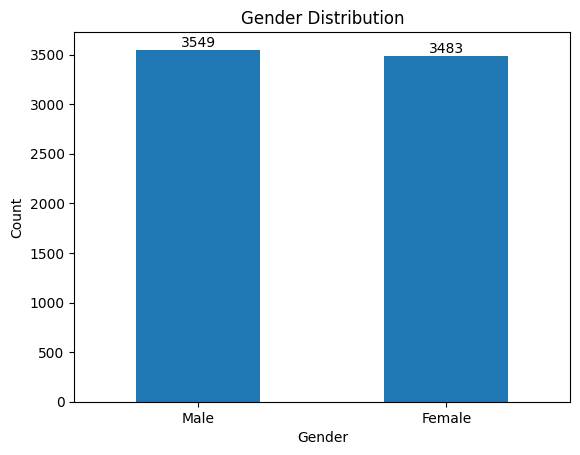

In [560]:
# Bar Chart: Gender Distribution
gender_count = df['gender'].value_counts()
ax = gender_count.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

The chart of gender distribution shows the total number of male and female customers, indicating a balanced gender distribution in the dataset, with slightly more males.

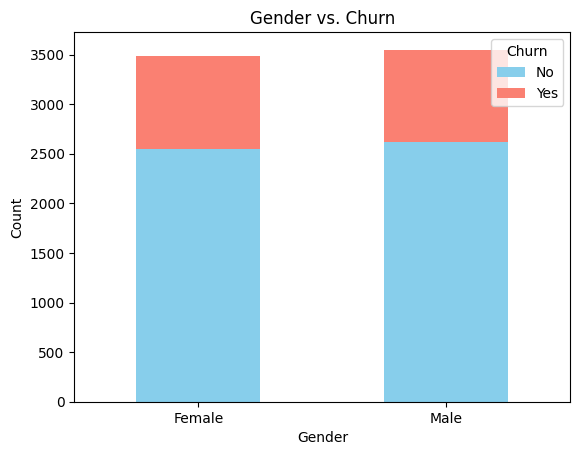

In [561]:
# Stacked Bar Chart: Gender vs. Churn
gender_churn = pd.crosstab(df['gender'], df['Churn'])
gender_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The graph illustrates the churn distribution (yes or no) within male and female groups, showing that both genders have similar churn rates without significant differences.

<ipython-input-562-ecae1641e5df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')


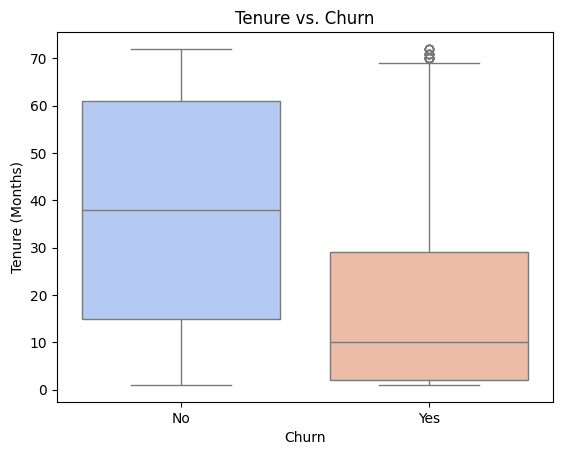

In [562]:
# Boxplot: Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

This graph depicts the relationship between customer tenure and churn, indicating that customers who churn tend to have shorter tenures compared to those who remain.

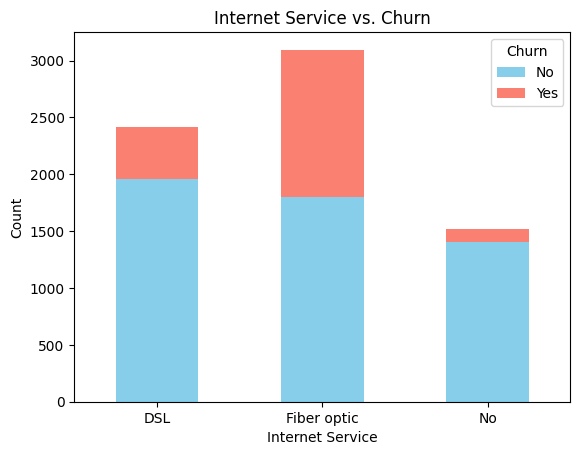

In [563]:
# Stacked Bar Chart: Internet Service vs. Churn
internet_service_churn = pd.crosstab(df['InternetService'], df['Churn'])
internet_service_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Internet Service vs. Churn')
plt.xlabel('Internet Service')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The graph compares the churn distribution based on the type of internet service, showing that customers with fiber-optic services are more likely to churn than those using DSL or without internet services.

<ipython-input-564-10eb8549cd63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


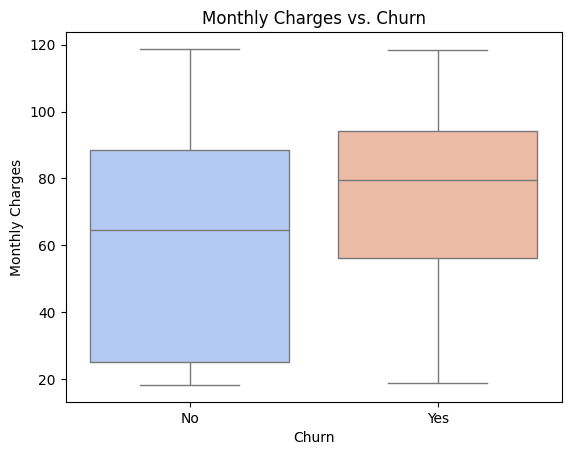

In [564]:
# Boxplot: Monthly Charges vs. Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The boxplot shows that customers who churned tend to have higher monthly charges compared to those who stayed, with a higher median value. This suggests that higher monthly charges may contribute to an increased likelihood of churn.

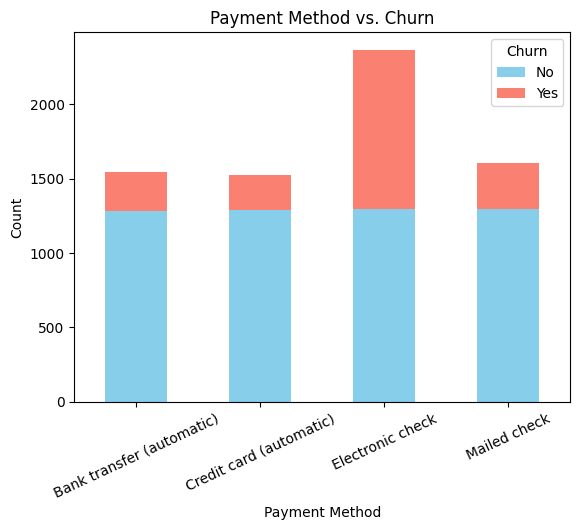

In [565]:
# Bar Chart: Payment Method vs. Churn
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])
payment_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Payment Method vs. Churn')
plt.xlabel('Payment Method')
plt.xticks(rotation=25)
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The graph shows that customers using the electronic check payment method have the highest churn rate, while other payment methods such as automatic bank transfer, credit card, or mailed checks have lower churn rates.

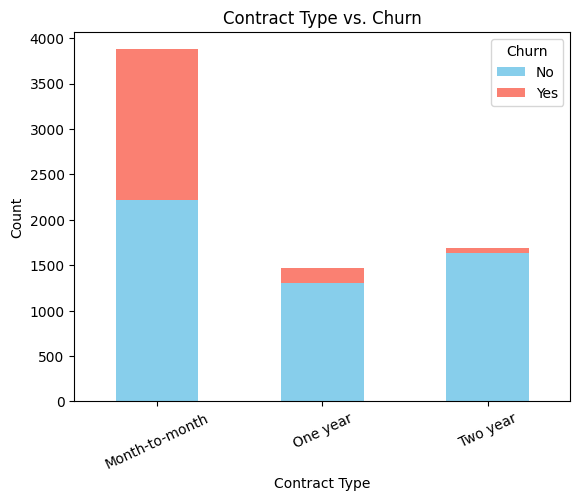

In [566]:
# Stacked Bar Chart: Contract Type vs. Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.xticks(rotation=25)
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The graph illustrates that customers with monthly contracts have significantly higher churn rates compared to those with one-year or two-year contracts, where the churn rate is relatively low.

In [567]:
# Check unique value of our target variable
print(df['Churn'].unique())

['No' 'Yes']


In [568]:
# Encode categorical columns and display the results
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,No
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,No
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,Yes


In [569]:
# Encode the target column and display the results
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


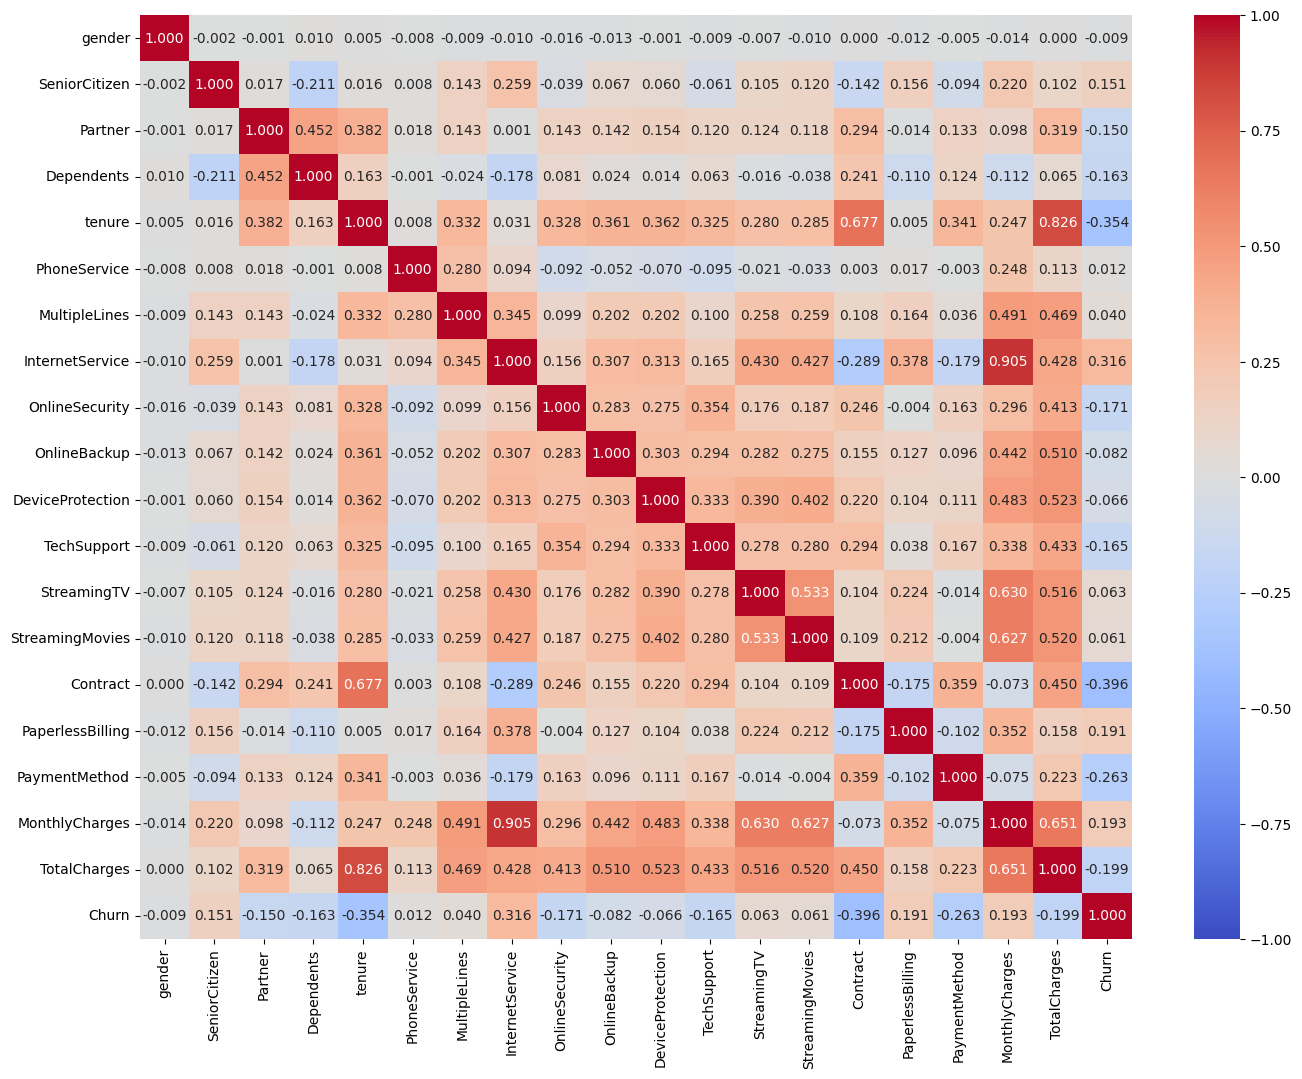

In [570]:
# Create a heatmap to see the correlation
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.show()

The Correlation Heatmap displays all positive and negative correlations for the variables in the dataset. It shows that the highest correlation is between InternetService and MonthlyCharges, followed by the correlation between tenure and TotalCharges.

# **Classification**

## Machine Learning

1. Splitting X and y

In [571]:
X = df.drop('Churn', axis=1)
y = df['Churn']

2. Use SMOTEENN for the dataset

In [572]:
smote_enn=SMOTEENN(random_state=42)
X, y = smote_enn.fit_resample(X, y)

3. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [573]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [574]:
X_train.shape, X_test.shape

((4672, 19), (1168, 19))

## Desicion Tree (Gini Index)


---

a. Defining the model using criterion Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

In [575]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [576]:
#b
y_pred_gini = clf_gini.predict(X_test)

In [577]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini index:", accuracy_gini)

Model accuracy score with criterion gini index: 0.8792808219178082


In [578]:
#d
train_score_gini = clf_gini.score(X_train, y_train)
print(f"Training set score: {train_score_gini:.4f}")

test_score_gini = clf_gini.score(X_test, y_test)
print(f"Test set score: {test_score_gini:.4f}")

Training set score: 0.8962
Test set score: 0.8793


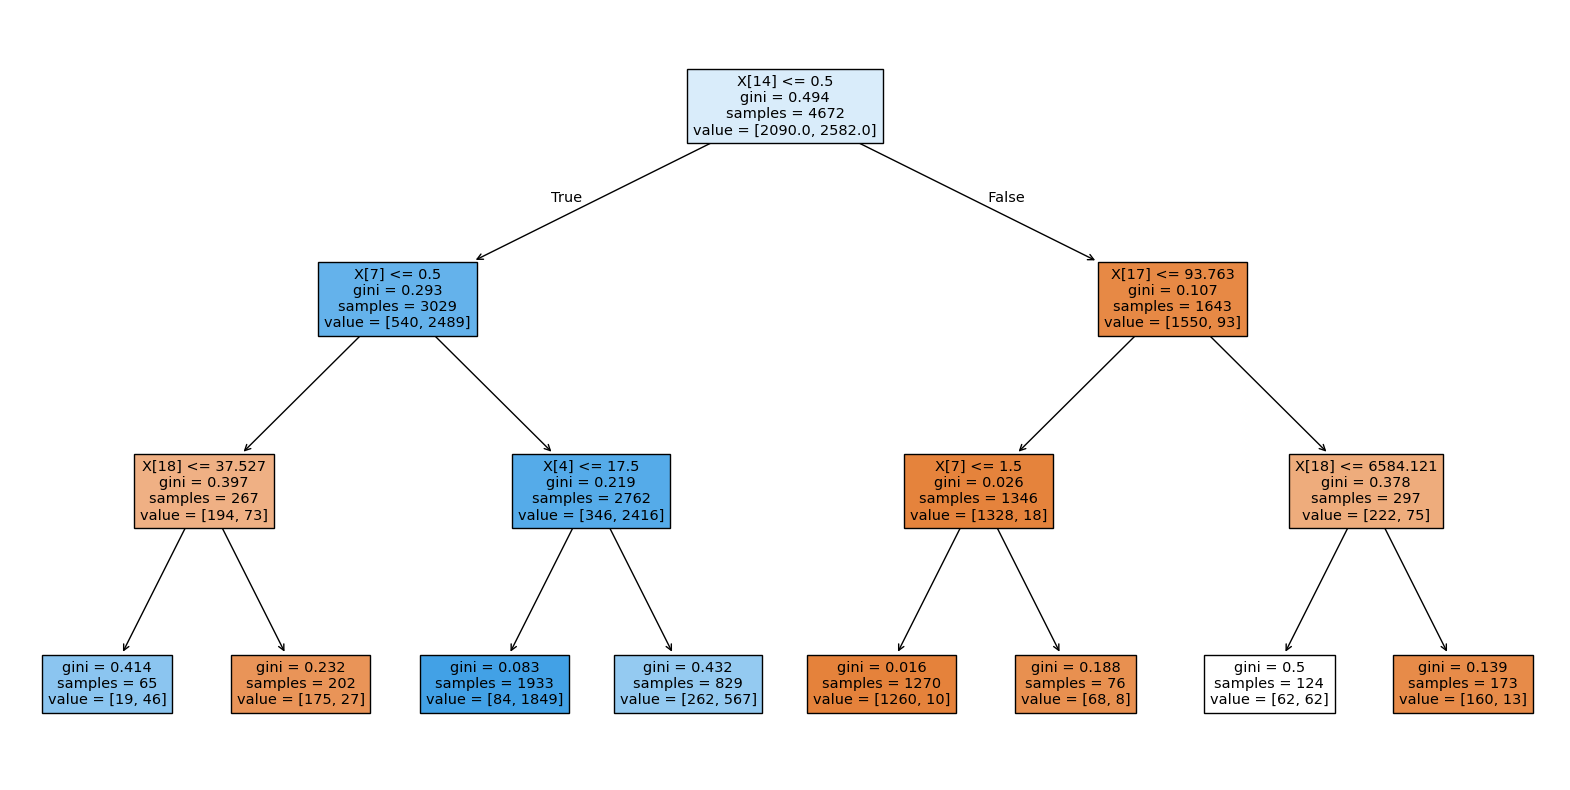

In [579]:
#e
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, filled=True, feature_names=[f"X[{i}]" for i in range(X.shape[1])])
plt.show()

In [580]:
#f
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index")
print(cm_gini)

Confusion Matrix Gini Index
[[458 110]
 [ 31 569]]


In [581]:
#g
cr_gini = classification_report(y_test, y_pred_gini)
print("Classification Report Gini Index")
print(cr_gini)

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       568
           1       0.84      0.95      0.89       600

    accuracy                           0.88      1168
   macro avg       0.89      0.88      0.88      1168
weighted avg       0.89      0.88      0.88      1168



In [582]:
#h
# The Decision Tree model achieved a training accuracy of 89.62% and a test accuracy of 87.93%, indicating it generalizes well to unseen data.
# The confusion matrix shows that it correctly classified 458 out of 568 non-churn customers (class 0) and 569 out of 600 churn customers (class 1). However, 110 non-churn and 31 churn customers were misclassified.
# The precision for churn customers is 0.84, meaning 84% of churn predictions are correct, while the recall is 0.95, indicating 95% of actual churn customers are identified. Overall, the weighted F1-score of 0.88 reflects good performance across both classes.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Confusion matrix <br>
f. Classification report <br>
g. Results and conclusion <br>

In [583]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [584]:
#b
y_pred_nb = nb.predict(X_test)

In [585]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with naive bayes: " , accuracy_nb)

Model accuracy score with naive bayes:  0.8946917808219178


In [586]:
#d
train_score_nb = nb.score(X_train, y_train)
print(f"Training set score: {train_score_nb:.4f}")

test_score_nb = nb.score(X_test, y_test)
print(f"Test set score: {test_score_nb:.4f}")

Training set score: 0.9041
Test set score: 0.8947


In [587]:
#e
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes")
print(conf_matrix_nb)

Confusion Matrix Naive Bayes
[[505  63]
 [ 60 540]]


In [588]:
#f
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report Naive Bayes")
print(class_report_nb)

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       568
           1       0.90      0.90      0.90       600

    accuracy                           0.89      1168
   macro avg       0.89      0.89      0.89      1168
weighted avg       0.89      0.89      0.89      1168



In [589]:
#g
# Naive Bayes achieved an accuracy score of 89.47%, with a balanced precision, recall, and F1-score for both churn and non-churn classes.
# The confusion matrix shows that 505 non-churn customers were correctly classified, while 63 were misclassified. Similarly, it correctly identified 540 churn customers but misclassified 60.
# The precision and recall for both classes are close to 0.90, indicating that this model is good at maintaining balance between identifying churn customers and avoiding false positives.

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Confusion matrix <br>
f. Classification report <br>
g. Results and conclusion <br>

In [590]:
#a
clf_rf = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [591]:
#b
y_pred_rf = clf_rf.predict(X_test)

In [592]:
#c
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model accuracy score with random forest: {accuracy_rf}")

Model accuracy score with random forest: 0.9220890410958904


In [593]:
#d
train_score_rf = clf_rf.score(X_train, y_train)
print(f"Training set score: {train_score_rf:.4f}")

test_score_rf = clf_rf.score(X_test, y_test)
print(f"Test set score: {test_score_rf:.4f}")

Training set score: 0.9495
Test set score: 0.9221


In [594]:
#e
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest")
print(cm_rf)

Confusion Matrix Random Forest
[[507  61]
 [ 30 570]]


In [595]:
#f
cr_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest")
print(cr_rf)

Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       568
           1       0.90      0.95      0.93       600

    accuracy                           0.92      1168
   macro avg       0.92      0.92      0.92      1168
weighted avg       0.92      0.92      0.92      1168



In [596]:
#g
# The Random Forest model achieved a high training accuracy of 94.95% and test accuracy of 92.21%, indicating strong generalization capabilities.
# The confusion matrix shows it correctly classified 507 non-churn and 570 churn customers, with only 61 non-churn and 30 churn customers misclassified.
# The precision for churn customers is 0.90, meaning 90% of churn predictions are correct, while the recall is 0.95, showing that 95% of actual churn customers are identified. The weighted F1-score of 0.92 demonstrates robust performance across both classes.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Confusion matrix <br>
f. Classification report <br>
g. Results and conclusion <br>

In [597]:
#a
clf_gb = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=42)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [598]:
#b
y_pred_gb = clf_gb.predict(X_test)

In [599]:
#c
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Model accuracy score with gradient boosting: {accuracy_gb}")

Model accuracy score with gradient boosting: 0.9375


In [600]:
#d
train_score_gb = clf_gb.score(X_train, y_train)
print(f"Training set score: {train_score_gb:.4f}")

test_score_gb = clf_gb.score(X_test, y_test)
print(f"Test set score: {test_score_gb:.4f}")

Training set score: 0.9602
Test set score: 0.9375


In [601]:
#e
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix Gradient Boosting")
print(cm_gb)

Confusion Matrix Gradient Boosting
[[527  41]
 [ 32 568]]


In [602]:
#f
cr_gb = classification_report(y_test, y_pred_gb)
print("Classification Report Gradient Boosting")
print(cr_gb)

Classification Report Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       568
           1       0.93      0.95      0.94       600

    accuracy                           0.94      1168
   macro avg       0.94      0.94      0.94      1168
weighted avg       0.94      0.94      0.94      1168



In [603]:
#g
# The Gradient Boosting model achieved the highest accuracy, with 96.02% on the training set and 93.75% on the test set.
# It correctly classified 527 non-churn and 568 churn customers, with only 41 non-churn and 32 churn customers misclassified.
# The precision for churn customers is high, indicating it predicts churn customers accurately, while the recall of 0.95 shows that it identifies 95% of actual churn cases. The balanced F1-score and excellent performance metrics make this model reliable for handling this dataset.

## Conclusion for Classification Models
Gradient Boosting is the best model for this dataset due to its superior accuracy and balanced performance, while Random Forest is a strong alternative. Naive Bayes offers competitive accuracy with simplicity, and the Decision Tree is effective but less reliable in predicting both classes evenly.

# **Clustering**

## Data Preprocessing

In [604]:
# Create a new dataframe that consists of tenure, MonthlyCharges, TotalCharges, and Churn
tenure_MC_TC_Churn_df= df[['InternetService', 'MonthlyCharges', 'TotalCharges']]
tenure_MC_TC_Churn_df.head()

,InternetService,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,1,56.95,1889.50
2,1,53.85,108.15
3,1,42.30,1840.75
4,2,70.70,151.65


In [605]:
# Scale dataset with standard scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tenure_MC_TC_Churn_df)
scaled_df = pd.DataFrame(scaled_data, columns=tenure_MC_TC_Churn_df.columns)

scaled_df.head()

,InternetService,MonthlyCharges,TotalCharges
0,-0.287852,-1.161694,-0.994194
1,-0.287852,-0.260878,-0.173740
2,-0.287852,-0.363923,-0.959649
3,-0.287852,-0.747850,-0.195248
4,0.996525,0.196178,-0.940457


In [606]:
# Get statistical information of the new dataset
stats = scaled_df.describe()
stats

,InternetService,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.030651e-16,6.062651e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.572229e+00,-1.547283e+00,-9.990692e-01
25%,-2.878524e-01,-9.709769e-01,-8.302488e-01
50%,-2.878524e-01,1.845440e-01,-3.908151e-01
75%,9.965245e-01,8.331482e-01,6.668271e-01
max,9.965245e-01,1.793381e+00,2.824261e+00


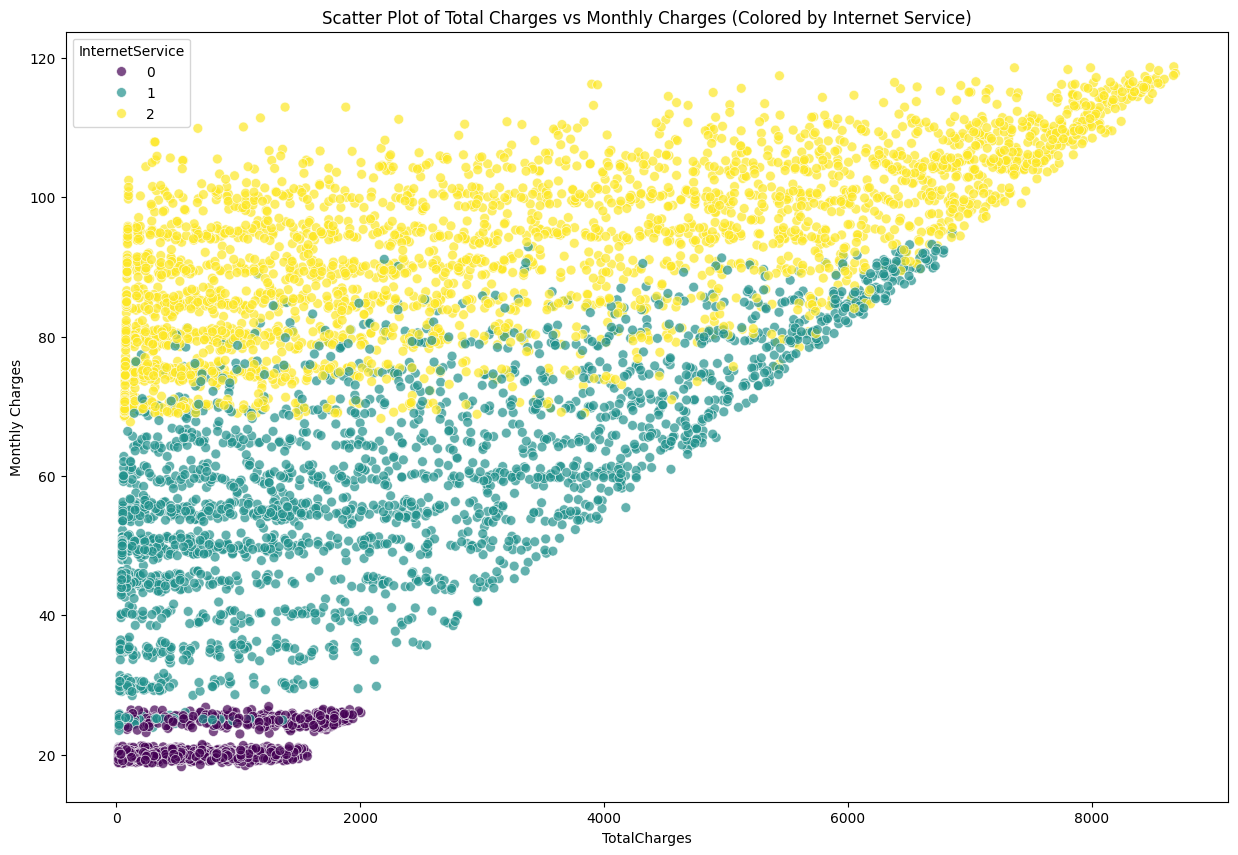

In [607]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="TotalCharges", y="MonthlyCharges", hue="InternetService", palette="viridis", s=50, alpha=0.7)
plt.title("Scatter Plot of Total Charges vs Monthly Charges (Colored by Internet Service)")
plt.xlabel("TotalCharges")
plt.ylabel("Monthly Charges")

plt.show()

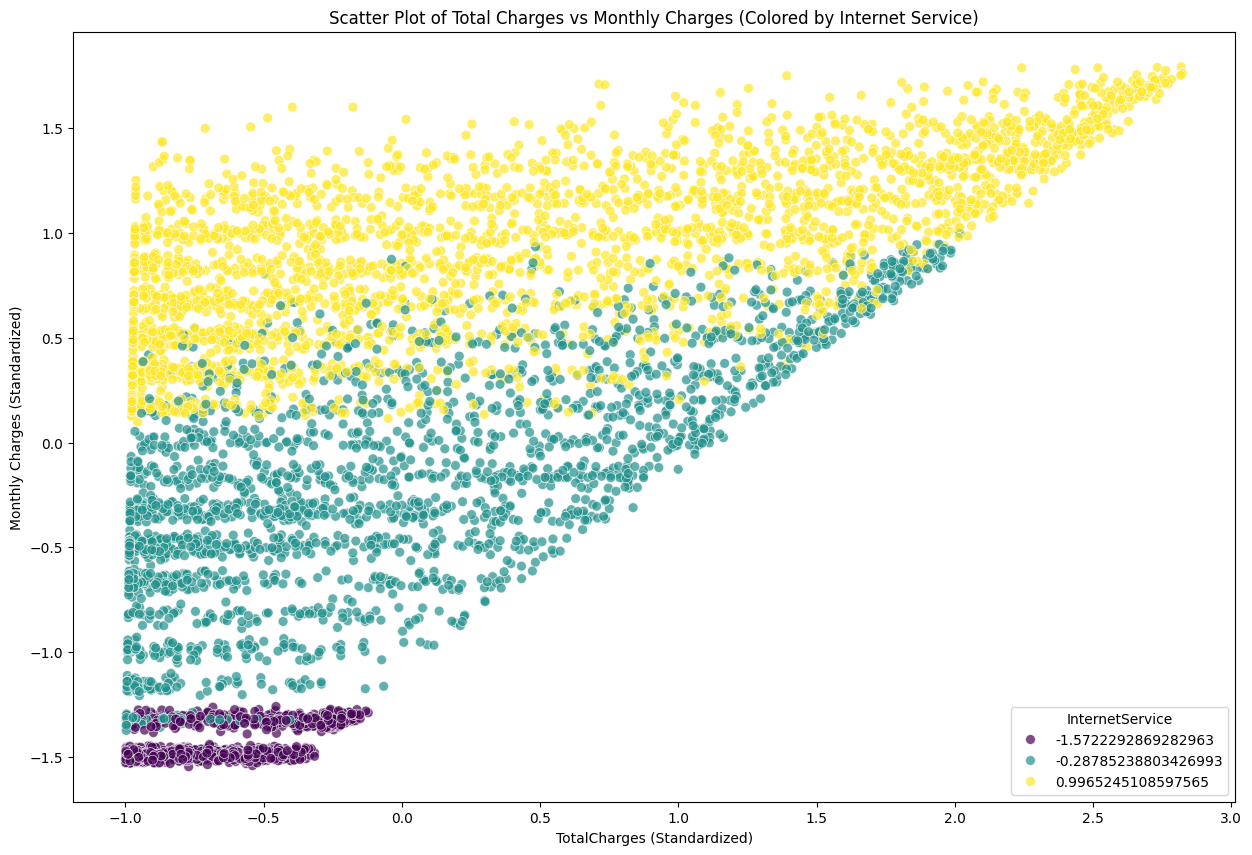

In [608]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=scaled_df, x="TotalCharges", y="MonthlyCharges", hue="InternetService", palette="viridis", s=50, alpha=0.7)
plt.title("Scatter Plot of Total Charges vs Monthly Charges (Colored by Internet Service)")
plt.xlabel("TotalCharges (Standardized)")
plt.ylabel("Monthly Charges (Standardized)")

plt.show()

The first graph shows the scatter plot of TotalCharges vs. Monthly Charges with color coding for different InternetService categories, based on the raw data. It highlights the positive correlation between TotalCharges and Monthly Charges, with distinct clusters for each InternetService type (0, 1, 2). The second graph displays the same data after applying a scaling technique, where the values have been standardized to bring both features into a uniform range. Although the relative positions and relationships between the points remain unchanged, the scale and axis values are standardized, making the data suitable for machine learning models sensitive to feature scaling.

## K-Means Clustering

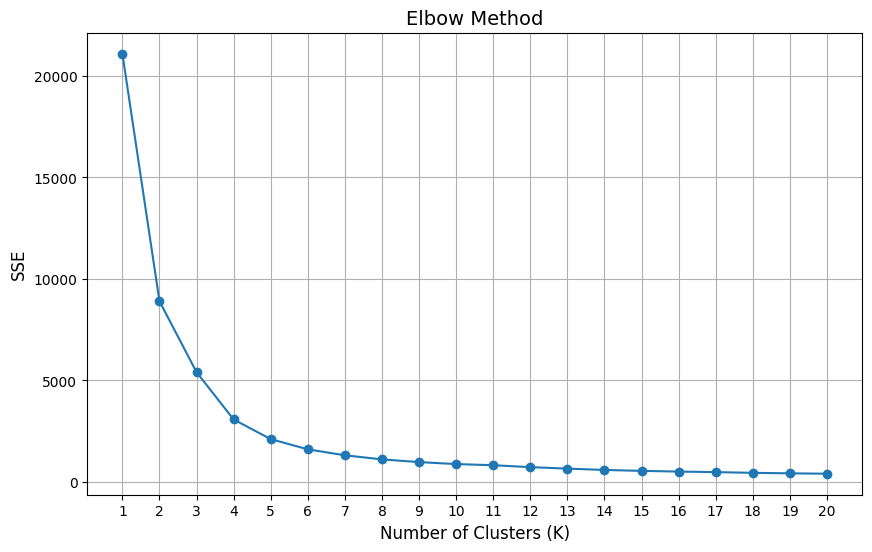

The best k for your model is: 4


In [609]:
sse = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('SSE', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find optimal k using KneeLocator
kneedle = KneeLocator(k_range, sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

In [610]:
# Assign cluster with K-Means Algorithm
kmeans=KMeans(n_clusters=5, init='random', max_iter=500, random_state=42)
y_pred=kmeans.fit_predict(scaled_df)

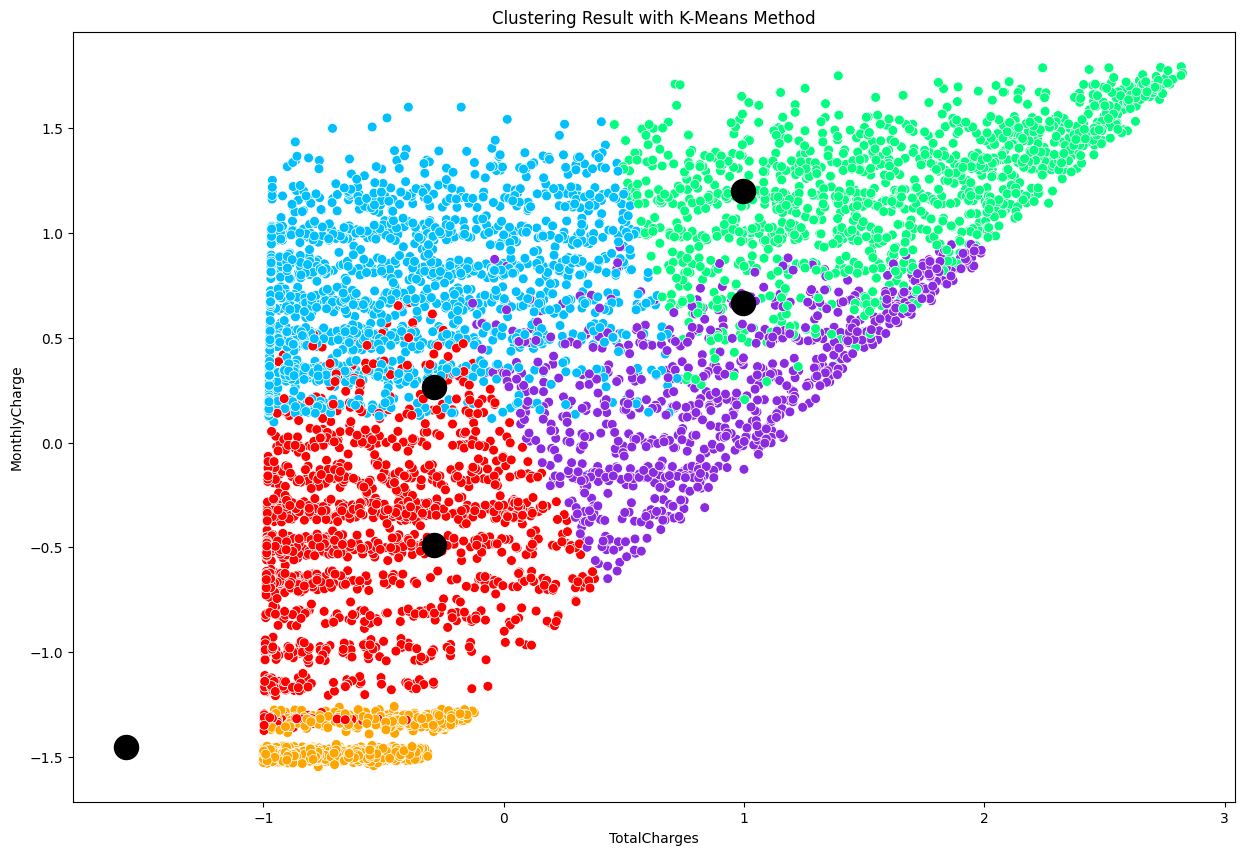

In [611]:
# Visualize the result using scatter plot
plt.figure(figsize=(15,10))

sns.scatterplot(x="TotalCharges", y="MonthlyCharges", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend=None, data=scaled_df, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("TotalCharges")
plt.ylabel("MonthlyCharge")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [612]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=scaled_df.columns)
df_inverse['KMeans']=y_pred
df_inverse.head()

,InternetService,MonthlyCharges,TotalCharges,KMeans
0,1.0,29.85,29.85,1
1,1.0,56.95,1889.50,1
2,1.0,53.85,108.15,1
3,1.0,42.30,1840.75,1
4,2.0,70.70,151.65,2


In [613]:
silhouette_avg = silhouette_score(scaled_df, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5871886385381949


In [614]:
# Group the data by cluster and calculate the mean of InternetService, MonthlyCharges, and TotalCharges for each cluster
cluster_stats = df_inverse.groupby('KMeans').agg({
    'InternetService': ['mean','std','min','max'],
    'MonthlyCharges':['mean','std','min','max'],
    'TotalCharges': ['mean','std','min','max']
    })

cluster_stats = cluster_stats.rename_axis('cluster')
cluster_stats

InternetService                     MonthlyCharges                    \
                   mean       std  min  max           mean        std    min   
cluster                                                                        
0              1.000000  0.000000  1.0  1.0      72.773946  11.236018  45.25   
1              1.000000  0.000000  1.0  1.0      50.033792  12.529139  23.45   
2              1.999448  0.023492  1.0  2.0      84.828532  10.252176  67.75   
3              0.000000  0.000000  0.0  0.0      21.076283   2.161599  18.25   
4              2.000000  0.000000  2.0  2.0     100.905875   9.323483  70.95   

                TotalCharges                                 
            max         mean          std      min      max  
cluster                                                      
0         94.80  4307.318970  1174.271565  1923.85  6859.05  
1         84.90   923.637860   816.458268    23.45  3139.80  
2        112.95  1287.003532  1062.487497    68.50  3919.15  
3         26.90   665.220329   555.158112    18.80  2006.95  
4        118.75  5908.742646  1351.697801  3327.05  8684.80

In [615]:
# Count data from each cluster
cluster_count = df_inverse['KMeans'].value_counts().sort_index()
cluster_count.name = 'KMeans'
cluster_count

,KMeans
KMeans,
0,854
1,1561
2,1812
3,1520
4,1285


### Conclusion for K-Means Clustering

*   **Cluster 0: Moderate Usage, Mid-range Customers**  
DSL internet users with relatively high average MonthlyCharges and TotalCharges, indicating that they are long-term customers who likely subscribe to mid-tier packages or bundled services.  

*   **Cluster 1: Low-cost Users, Short-term Customers**  
DSL internet users with lower average MonthlyCharges and TotalCharges. This suggests that they are likely new customers or those subscribing to basic packages.  

*   **Cluster 2: Heavy Users, Moderate Spenders**  
Most customers in this cluster use Fiber optic internet with relatively high MonthlyCharges and moderate TotalCharges. This indicates that they are likely new customers subscribing to premium Fiber optic packages.  

*   **Cluster 3: Low-cost, Minimal-service Users**  
This cluster consists of customers who do not use internet services at all, with the lowest MonthlyCharges and TotalCharges among all clusters. This suggests they are likely only using basic phone services.  

*   **Cluster 4: High-value, Long-term Customers**  
Fiber optic internet users with the highest MonthlyCharges and TotalCharges. This indicates that they are long-term customers subscribing to premium Fiber optic packages.  

### Recommendations
*   For Cluster 0 and Cluster 4, focus on retention through loyalty discounts, premium services, and personalized offers to retain valuable customers.  
*   For Cluster 1 and Cluster 2, encourage customers to upgrade by offering the benefits of premium packages or providing incentives.  
*   For Cluster 3, target them with low-cost discounts or add-ons to reduce churn.  

## Hierarchical Clustering

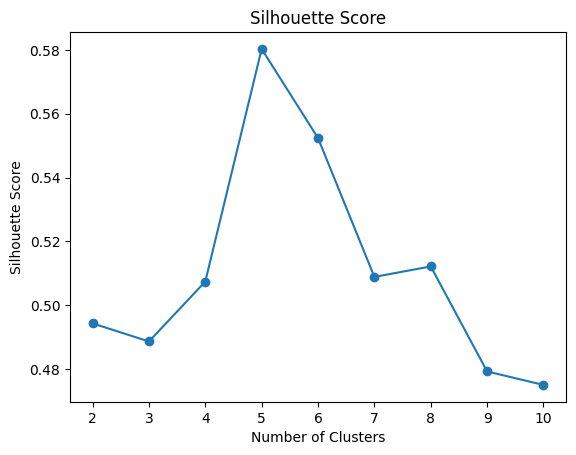

In [616]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(scaled_df, method='average'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(scaled_df, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [617]:
# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
y_pred = agglo.fit_predict(scaled_df)

In [618]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=scaled_df.columns)
df_inverse['Agglo']=y_pred
df_inverse.head()

,InternetService,MonthlyCharges,TotalCharges,Agglo
0,1.0,29.85,29.85,3
1,1.0,56.95,1889.50,3
2,1.0,53.85,108.15,3
3,1.0,42.30,1840.75,3
4,2.0,70.70,151.65,2


In [619]:
silhouette_avg = silhouette_score(scaled_df, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5802979036621692


In [620]:
# Group the data by cluster and calculate the mean of InternetService, MonthlyCharges, and TotalCharges for each cluster
cluster_summary_agglo = df_inverse.groupby('Agglo').agg({
    'InternetService': ['mean', 'min', 'max'],
    'MonthlyCharges': ['mean', 'min', 'max'],
    'TotalCharges': ['mean', 'min', 'max']
})
cluster_summary_agglo = cluster_summary_agglo.rename_axis("cluster")
cluster_summary_agglo

InternetService           MonthlyCharges                TotalCharges  \
                   mean  min  max           mean    min     max         mean   
cluster                                                                        
0                   1.0  1.0  1.0      73.782459  52.30   94.80  4234.486946   
1                   2.0  2.0  2.0     101.279689  70.95  118.75  6082.010429   
2                   2.0  2.0  2.0      85.402648  67.75  116.25  1411.700341   
3                   1.0  1.0  1.0      49.444994  23.45   88.95   955.212484   
4                   0.0  0.0  0.0      21.076283  18.25   26.90   665.220329   

                           
             min      max  
cluster                    
0        1549.75  6859.05  
1        3756.45  8684.80  
2          68.50  4149.45  
3          23.45  3635.15  
4          18.80  2006.95

In [621]:
# Count data from each cluster
cluster_count = df_inverse['Agglo'].value_counts().sort_index()
cluster_count.name = 'Agglo'
cluster_count

,Agglo
Agglo,
0,858
1,1189
2,1907
3,1558
4,1520


### Hierarchical Visualization

Average Linkage

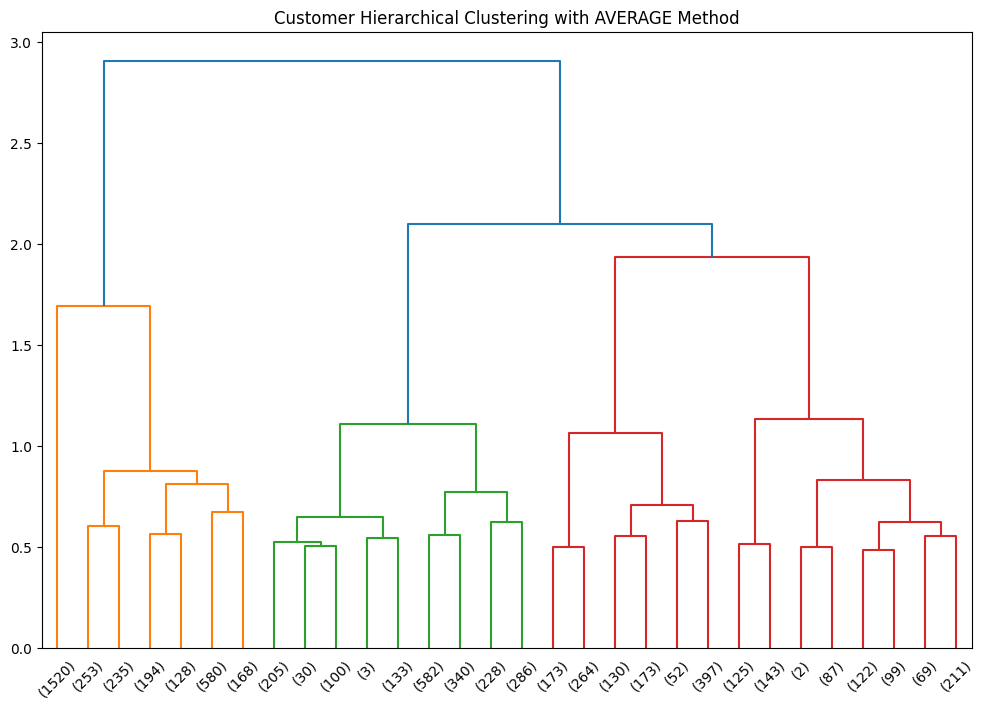

In [622]:
# Perform hierarchical clustering using average linkage
linked = linkage(scaled_df, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Customer Hierarchical Clustering with AVERAGE Method')
plt.show()

### Conclusion for Hierarchical Clustering

*   **Cluster 0: Moderate Usage, Mid-range Customers**  
Customers use DSL (InternetService=1) with moderate MonthlyCharges and high TotalCharges, indicating long-term subscriptions to mid-range plans.

*   **Cluster 1: High-value, Long-term Customers**  
Fiber optic users with high MonthlyCharges and TotalCharges, indicating premium long-term customers.

*   **Cluster 2: Heavy Users, Moderate Spenders**  
Newer Fiber optic users with moderate MonthlyCharges and low TotalCharges.

*   **Cluster 3: Low-cost, Minimal-service Users**  
This cluster consists of DSL users with low MonthlyCharges and TotalCharges, indicating minimal service use.

*   **Cluster 4: Non-Internet Users**  
Customers with no internet service and the lowest MonthlyCharges and TotalCharges.

### Recommendations
*   Retain valuable customers in Clusters 0 and 1 with loyalty programs, discounts, and premium services.  
*   Upsell to Clusters 1 and 2 by showcasing premium package benefits and offering incentives.
*   Engage Clusters 3 and 4 with affordable add-ons and introductory offers to reduce churn and drive internet adoption.